In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 

In [98]:
sales = pd.read_csv('wk3_kc_house_test_data.csv')
X_test = sales['sqft_living']
y_test = sales['price']

In [99]:
# Ridge regression with alpha value of 1.5e-5 on first set 
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
x_train_set_1 = set_1['sqft_living']
y_train_set_1 = set_1['price']

ridge = Ridge(normalize = True)

ridge.set_params(alpha = 1.5e-5)
ridge.fit(x_train_set_1.values.reshape(-1,1), y_train_set_1.values.reshape(-1,1))
coefs_set_1 = ridge.coef_

# The coefficient on first set will be as below 
print(coefs_set_1)

#error calculation
pred2 = ridge.predict(X_test.values.reshape(-1,1))
print("\nMSE = ",mean_squared_error(y_test, pred2))  

[[293.61318695]]

MSE =  64280941979.51311


In [100]:
# Ridge regression with alpha value of 1.5e-5 on 2nd set 
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
x_train_set_2 = set_2['sqft_living']
y_train_set_2 = set_2['price']

ridge = Ridge(normalize = True)

ridge.set_params(alpha = 1.5e-5)
ridge.fit(x_train_set_2.values.reshape(-1,1), y_train_set_2.values.reshape(-1,1))
coefs_set_2 = ridge.coef_
    
# The coefficient on 2nd set will be as below 
print(coefs_set_2)

#error calculation
pred2 = ridge.predict(X_test.values.reshape(-1,1))
print("\nMSE = ",mean_squared_error(y_test, pred2)) 

[[266.99015515]]

MSE =  64383381290.96651


In [101]:
# Ridge regression with alpha value of 1.5e-5 on 3rd set 
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
x_train_set_3 = set_3['sqft_living']
y_train_set_3 = set_3['price']

ridge = Ridge(normalize = True)

ridge.set_params(alpha = 1.5e-5)
ridge.fit(x_train_set_3.values.reshape(-1,1), y_train_set_3.values.reshape(-1,1))
coefs_set_3 = ridge.coef_
    
# The coefficient on 3rd set will be as below 
print(coefs_set_3)

#error calculation
print("\nMSE = ",mean_squared_error(y_test, pred2)) 

[[292.20743799]]

MSE =  64383381290.96651


In [102]:
# Ridge regression with alpha value of 1.5e-5 on 4th set 
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')
x_train_set_4 = set_4['sqft_living']
y_train_set_4 = set_4['price']

ridge = Ridge(normalize = True)

ridge.set_params(alpha = 1.5e-5)
ridge.fit(x_train_set_4.values.reshape(-1,1), y_train_set_4.values.reshape(-1,1))
coefs_set_4 = ridge.coef_
   
# The coefficient on 4th set will be as below 
print(coefs_set_4)

#error calculation
pred2 = ridge.predict(X_test.values.reshape(-1,1))
print("\nMSE = ",mean_squared_error(y_test, pred2)) 

[[266.32970046]]

MSE =  64406143015.32575


In [103]:
if(max(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_1):
    print("coefs_set_1 has largest values")
elif(max(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_2):
    print("coefs_set_2 has largest values")
elif(max(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_3):
    print("coefs_set_3 has largest values")
else :
    print("coefs_set_4 has largest values")

coefs_set_1 has largest values


In [104]:
if(min(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_1):
    print("coefs_set_1 has smallest values")
elif(min(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_2):
    print("coefs_set_2 has smallest values")
elif(min(coefs_set_1, coefs_set_2, coefs_set_3, coefs_set_4) == coefs_set_3):
    print("coefs_set_3 has smallest values")
else :
    print("coefs_set_4 has smallest values")

coefs_set_4 has smallest values


Now calculate cross validation in each sets

In [105]:
clf = RidgeCV(alphas=np.logspace(1, 7, num=13)).fit(x_train_set_1.values.reshape(-1,1), y_train_set_1.values.reshape(-1,1))
clf.score(x_train_set_1.values.reshape(-1,1), y_train_set_1.values.reshape(-1,1))

0.5310777588676552

In [106]:
clf = RidgeCV(alphas=np.logspace(1, 7, num=13)).fit(x_train_set_2.values.reshape(-1,1), y_train_set_2.values.reshape(-1,1))
clf.score(x_train_set_2.values.reshape(-1,1), y_train_set_2.values.reshape(-1,1))

0.491322395294809

In [107]:
clf = RidgeCV(alphas=np.logspace(1, 7, num=13)).fit(x_train_set_3.values.reshape(-1,1), y_train_set_3.values.reshape(-1,1))
clf.score(x_train_set_3.values.reshape(-1,1), y_train_set_3.values.reshape(-1,1))

0.48976435083873765

In [108]:
clf = RidgeCV(alphas=np.logspace(1, 7, num=13)).fit(x_train_set_4.values.reshape(-1,1), y_train_set_4.values.reshape(-1,1))
clf.score(x_train_set_4.values.reshape(-1,1), y_train_set_4.values.reshape(-1,1))

0.45378932033549774

Now Ridge regression using gradient descent (Assignment 2)

In [109]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = np.dot(errors,feature) * 2
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    elif feature_is_constant == False:
        derivative = np.dot(errors,feature) * 2 + 2*l2_penalty*weight
    else:
        derivative = 'derivative not exist!!!'
    return derivative

In [110]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [111]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 
    features = ['constant'] + features 
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    return(feature_matrix, output_array)

In [112]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print ('Start with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) 
    iteration = 0
    print_frequency = 1  
    
    while iteration < max_iterations:
        iteration += 1  
        
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
       
        predictions = predict_output(feature_matrix,weights)
        errors = predictions - output
        if iteration%print_frequency==0:
            print ('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)):
            if i ==0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False)
            weights[i] = weights[i] - step_size * derivative
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', str(weights))
    return weights

In [113]:
simple_features = ['sqft_living']
my_output = 'price'

sales = pd.read_csv('kc_house_data.csv')
x = sales['sqft_living']
y = sales['price']

train_data, test_data = train_test_split(sales, test_size=0.2)

(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [115]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations)

Start with l2_penalty = 0
Iteration = 1
Cost function =  7295932327818783.0
Iteration = 2
Cost function =  5295705146721276.0
Iteration = 3
Cost function =  3946502758963948.5
Iteration = 4
Cost function =  3036432592763897.5
Iteration = 5
Cost function =  2422567901351448.0
Iteration = 6
Cost function =  2008501081712126.8
Iteration = 7
Cost function =  1729202836467641.2
Iteration = 8
Cost function =  1540809306489795.0
Iteration = 9
Cost function =  1413733240874956.8
Iteration = 10
Cost function =  1328017311803976.8
Iteration = 20
Cost function =  1153840699697181.0
Iteration = 30
Cost function =  1150444699879508.2
Iteration = 40
Cost function =  1150378486125085.0
Iteration = 50
Cost function =  1150377194700418.0
Iteration = 60
Cost function =  1150377169095482.5
Iteration = 70
Cost function =  1150377168170801.0
Iteration = 80
Cost function =  1150377167727322.0
Iteration = 90
Cost function =  1150377167293224.5
Iteration = 100
Cost function =  1150377166859310.5
Iteration = 2

In [116]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)

Start with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7295932327818783.0
Iteration = 2
Cost function =  5515354074285989.0
Iteration = 3
Cost function =  4828038678725884.0
Iteration = 4
Cost function =  4562730194853791.0
Iteration = 5
Cost function =  4460319254069094.0
Iteration = 6
Cost function =  4420787874753590.0
Iteration = 7
Cost function =  4405528434570017.0
Iteration = 8
Cost function =  4399638128258549.5
Iteration = 9
Cost function =  4397364371454575.5
Iteration = 10
Cost function =  4396486627400416.0
Iteration = 20
Cost function =  4395933953627753.0
Iteration = 30
Cost function =  4395932961363338.5
Iteration = 40
Cost function =  4395932009616401.5
Iteration = 50
Cost function =  4395931057872838.0
Iteration = 60
Cost function =  4395930106129674.0
Iteration = 70
Cost function =  4395929154386907.0
Iteration = 80
Cost function =  4395928202644537.5
Iteration = 90
Cost function =  4395927250902566.0
Iteration = 100
Cost function =  4395926299160994.0


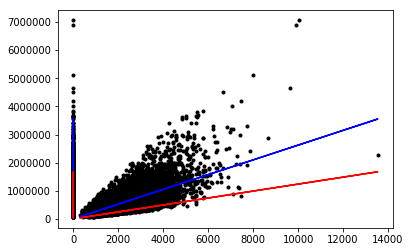

In [117]:
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [118]:
predictions = predict_output(simple_test_feature_matrix, initial_weights)
error = test_output - predictions
RSS = np.dot(error,error)

print (RSS)

1921392810653287.0


In [119]:
predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
error = test_output - predictions
RSS = np.dot(error,error)

print (RSS)

333674557408232.75


In [120]:
predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
error = test_output - predictions
RSS = np.dot(error,error)

print (RSS)

788643429486470.6
